## Data Visualisation - Graded Questions


`Note` - *This stub file doesn't contain the conceptual questions asked on the platform*

### I) Marks Analysis

In the **'Marks.csv'** file, you can find the scores obtained by 200 students in 4 subjects of a standardised test. The different columns - `Score A`, `Score B`, `Score C` and `Score D` indicate the score obtained by a particular student in the respective subjects A, B, C and D.



Load the dataset to your notebook and answer the following questions

In [323]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [324]:
#Load the dataset
df1 = pd.read_csv("Marks.csv")

**Q1)** Load the dataset and plot a histogram for the `Score A` column by keeping the `number of bins to 6`. Which bin range among the following has the highest frequency?

(`Note` - *The bin ranges mentioned in the options are approximate values for the bin ranges that you'll actually get when you plot the histogram*)

    a)0-50
    b)50-100
    c)150-200
    d)200-250

(array([36., 34., 31., 32., 43., 24.]),
 array([  0.,  50., 100., 150., 200., 250., 300.]),
 <BarContainer object of 6 artists>)

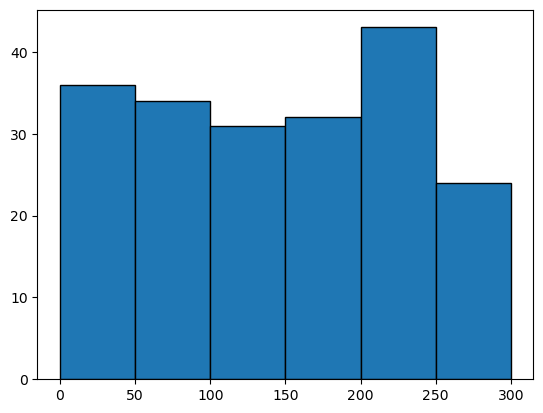

In [325]:
plt.hist(df1['Score A'], bins = 6,range=[0,300], edgecolor = 'black')

**Q2)** Plot a box plot for the column `Score C` and choose the correct option.

    A - The 25th percentile lies between 20 and 40
    B - The 75th percentile lies between 40 and 60
    C - The 25th percentile lies between 0 and 20
    D - Both B and C

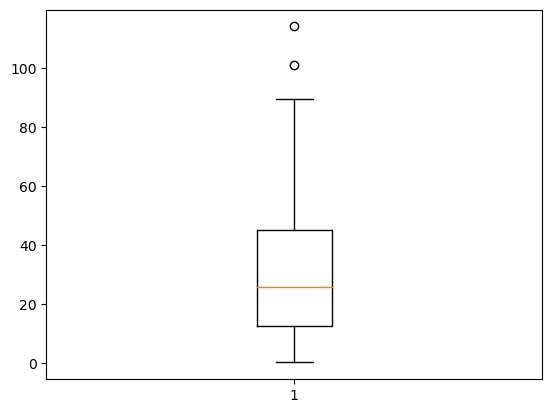

In [326]:
plt.boxplot(df1['Score C'])
plt.show()

D is correct: Both B and C are correct.

### II) Superstore Data

In the `superstore.csv` file, you have the details of orders purchased in an American online retail store. Load the dataset, observe and analyse the different columns and answer the following questions.

In [327]:
#Load the dataset
df2 = pd.read_csv("superstore.csv")

**Q4)** Plot a pie-chart to find the Ship Mode through which most of the orders are being delivered.

     a)Standard Class
     b)First Class
     c)Second Class
     d)Same Day
     

In [328]:
len(df2.loc[df2['Ship Mode'] == 'First Class'])

1538

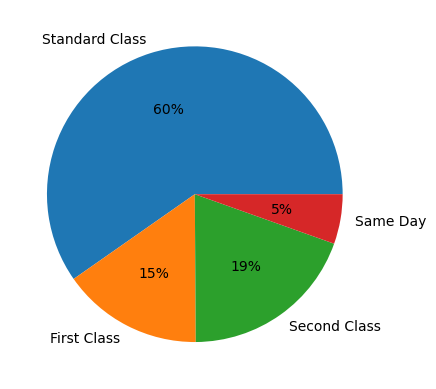

In [329]:
mylabels = ['Standard Class', 'First Class', 'Second Class','Same Day']
sizes = [len(df2.loc[df2['Ship Mode'] == 'Standard Class']),
         len(df2.loc[df2['Ship Mode'] == 'First Class']),
         len(df2.loc[df2['Ship Mode'] == 'Second Class']),
         len(df2.loc[df2['Ship Mode'] == 'Same Day'])]
plt.pie(sizes, labels=mylabels, autopct='%1.0f%%')
plt.show()

**Q5)** Plot a bar chart comparing the average `Discount` across all the `Regions` and report back the `Region` getting the highest average discount

**Note** - You need to clean the `Discount` column first

    a)Central
    b)South
    c)West
    d)East

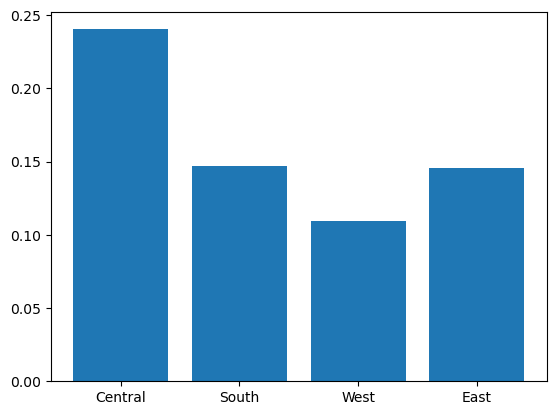

In [330]:
dict1 = {'Central' : np.mean([float(e.strip('%')) for e in df2.loc[df2.Region == "Central"].Discount]),
'South' :  np.mean([float(e.strip('%')) for e in df2.loc[df2.Region == "South"].Discount]),
'West' : np.mean([float(e.strip('%')) for e in df2.loc[df2.Region == "West"].Discount]),
'East' : np.mean([float(e.strip('%')) for e in df2.loc[df2.Region == "East"].Discount])}
plt.bar(dict1.keys(),dict1.values())
plt.show()

In [331]:
Max = max(dict1, key= lambda x: dict1[x])
print(Max)

Central


<AxesSubplot: xlabel='Ship Mode', ylabel='Segment'>

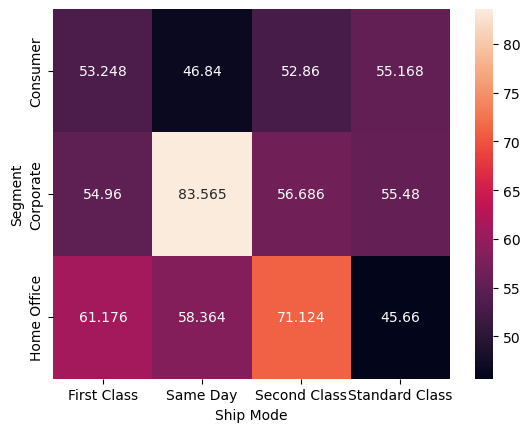

In [332]:
table = df2.pivot_table(index = 'Segment', columns = 'Ship Mode', values = 'Sales',aggfunc = 'median')
sns.heatmap(table, annot = True, fmt = 'g')

I made this heatmap to see the correlation between the segment of the order and the ship mode as it relates to the amount of sales made
Observations:\
1.) Same day shipping in the corporate segment makes the most sales on average\
2.) First Class shipping for home fofice is 2nd largest mean.\
3.) Same Day shipping for Consumer is the least sales on avg\
4.) Standard class more or less gets the same avg sales from all segments

<AxesSubplot: xlabel='Ship Mode', ylabel='Segment'>

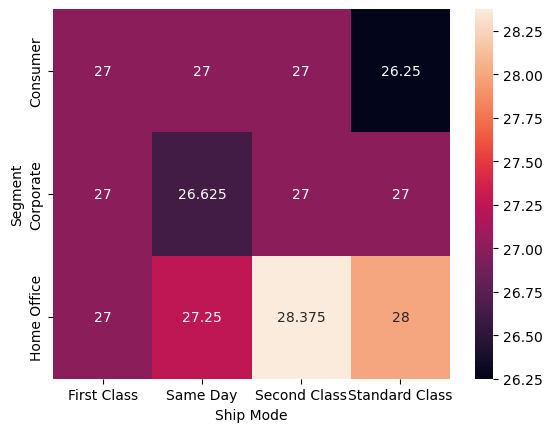

In [333]:
x = df2.Profit/df2.Sales * 100
#table = df2.pivot_table(index = 'Segment', columns = 'Ship Mode', values = df2.Profit/df2.Sales * 100 ,aggfunc = 'mean')
table = pd.DataFrame({'Segment': df2.Segment,
             'Ship Mode': df2['Ship Mode'],
             'Median Profit%': (df2.Profit/df2.Sales * 100)})
x = table.pivot_table(index = 'Segment', columns = 'Ship Mode', values = 'Median Profit%' ,aggfunc = 'median')
sns.heatmap(x, annot = True, fmt = 'g')

This reveals something interesting-- The median of all the profit%'s is more or less exactly the same.\ This means no matter the segment or the ship mode, the profit% is same.

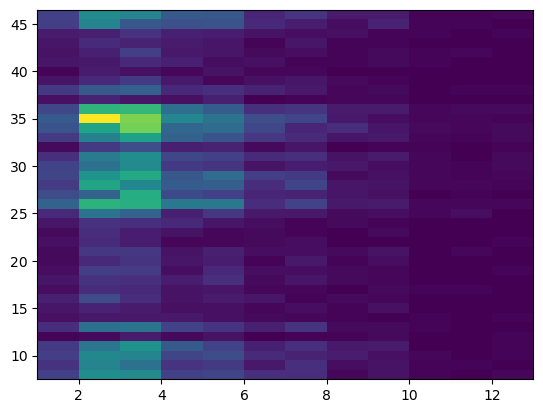

In [334]:
a = np.percentile(df2.Quantity, 0)
b = np.percentile(df2.Quantity, 100)
c = np.percentile(df2.Profit/df2.Sales * 100, 25)
d = np.percentile(df2.Profit/df2.Sales * 100, 90)

plt.hist2d(df2.Quantity,df2.Profit/df2.Sales * 100,bins = (np.arange(a, b, 1), np.arange(c, d, 1)))
plt.show()

This is an interesting one. We can see that The frequency of Quantity is maximum between 2 and 4 and the  frequency of Profit% of Sale is also maximum for that region around 35%.\
What can we observe from this? probably that no. of products making the most profits overall are shipped in groups of 2 to 4.

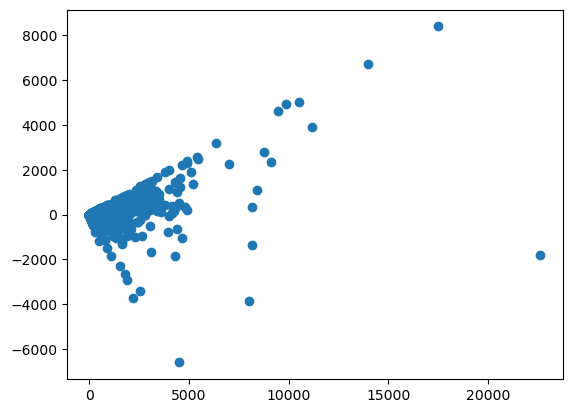

In [335]:
plt.scatter(df2.Sales, df2.Profit)
plt.show()


A simple Sales VS profit scatterplot reveals some kind of pattern -- see that?\
Theres a line it can't cross. 2 lines. One for profit and one for loss. Let's see what profit % reveals

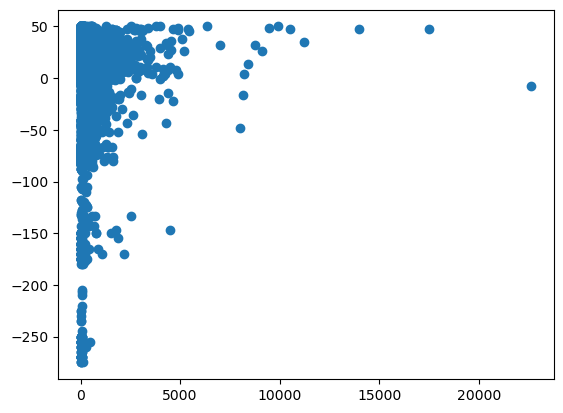

In [336]:
plt.scatter(df2.Sales, df2.Profit/df2.Sales * 100)
plt.show()

Ah. The products cant seem to top 50% proffit in sales and the worst of the bunch can't drop below 300% loss.\
Apart from that, we can see that most of the sales of products are less than 5,000.
There seems to be a weird sort of island of loss where a few sales of products are losing a lot of moeny. This probably maps to a high discount for those items.\
But are all the products together arent creating enough profi? At first glance it'd seem like they're being cancelled out by the losses. We'll have to see the density of the profit makers to be sure--

Total Profit: 12.467217240315604 %


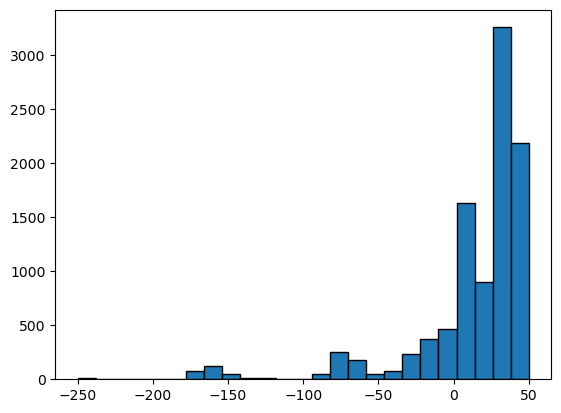

In [341]:
plt.hist(df2.Profit/df2.Sales * 100 , bins = 25, range = [-250,50], edgecolor = 'black')
print('Total Profit:',df2.Profit.sum()/df2.Sales.sum() * 100,'%')

Seems our fears were misplaced. The companies doing just fine overall. We can see a large majority of products are making a profit. There are some small islands of loss probably caused by discounts the company can afford. Lets see how much profit or loss each discount makes.

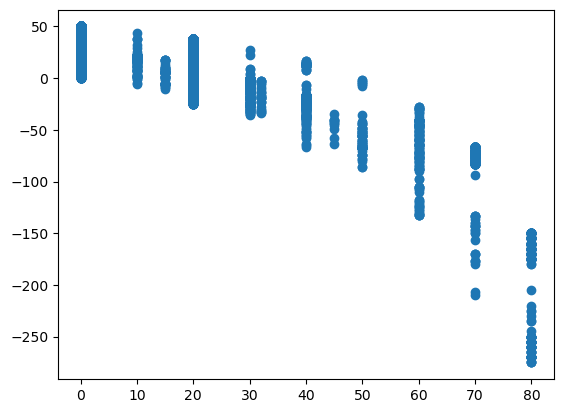

In [338]:
def clean(self):
    return float(self.replace('%', ''))
plt.scatter(df2.Discount.apply(clean) * 100, df2.Profit/df2.Sales * 100)
plt.show()

Therefore we see that, funny enough, the higher discounted items are leading to a greater loss% for the company. Every discount from 0 - 30/35% seems to make profit, but after that they start making a loss.